<img src="../img/logo_white_bkg_small.png" align="right" />

#  Automate it All! - Answers
This worksheet covers concepts relating to automating a machine learning model using the techniques we learned.  It should take no more than 20-30 minutes to complete.  Please raise your hand if you get stuck.  

In [1]:
# Load Libraries - Make sure to run this cell!
import pandas as pd
from sklearn.model_selection import train_test_split
import scikitplot as skplt
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import lime
from tpot import TPOTClassifier
%matplotlib inline

/Users/cgivre/anaconda3/lib/python3.7/site-packages/deap/tools/_hypervolume/pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)


## Step One:  Import the Data
In this example, we're going to use the dataset we used in worksheet 5.3.  Run the following code to read in the data, extract the features and target vector.

In [4]:
df_final = pd.read_csv('../data/dga_features_final_df.csv')
target = df_final['isDGA']
feature_matrix = df_final.drop(['isDGA'], axis=1)

Next, perform the test/train split in the conventional manner.

In [5]:
feature_matrix_train, feature_matrix_test, target_train, target_test = train_test_split(feature_matrix, 
                                                                                        target, 
                                                                                        test_size=0.25)

## Step Two:  Run the Optimizer
In the next step, use TPOT to create a classification pipeline using the DGA data set that we have been using.  The `TPOTClassifier()` has many configuration options and in the interest of time, please set the following variables when you instantiate the classifier.

* `max_eval_time_mins`:  In the interests of time, set this to 15 or 20.
* `verbosity`: Set to 1 or 2 so you can see what TPOT is doing.


**Note:  This step will take some time, so you might want to get some coffee or a snack when it is running.**  While this is running take a look at the other configuration options available here: http://epistasislab.github.io/tpot/api/.  

In [ ]:
# Your code here... 
optimizer = TPOTClassifier(n_jobs=-1, verbosity=2, max_eval_time_mins=5)
optimizer.fit(feature_matrix_train, target_train)

Generation 1 - Current best internal CV score: 0.9199974888609873
Generation 2 - Current best internal CV score: 0.9199974888609873
Generation 3 - Current best internal CV score: 0.9199974888609873
Generation 4 - Current best internal CV score: 0.9199974888609873
Generation 5 - Current best internal CV score: 0.9199974888609873
Generation 6 - Current best internal CV score: 0.9199974888609873


## Step Three:  Evaluate the Performance
Now that you have a trained model, the next step is to evaluate the performance and see how TPOT did in comparison with earlier models we created.  Use the techniques you've learned to evaluate the performance of your model.  Specifically, print out the `classification report` and a confusion matrix. 

Unfortunately, Yellowbrick will not work in this instance, however, you can generate a similar visual confusion matrix with the following code:

```
import scikitplot as skplt
skplt.metrics.confusion_matrix(optimized_preds, target_test)

```

What is the accuracy of your model?  Is it significantly better than what you did in earlier labs?

In [35]:
predictions = optimizer.predict(feature_matrix_test)

In [38]:
print(classification_report(predictions, target_test))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       266
           1       0.88      0.96      0.92       234

   micro avg       0.92      0.92      0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500



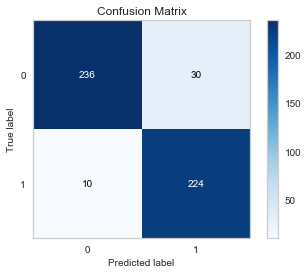

In [37]:
skplt.metrics.plot_confusion_matrix(optimized_preds, target_test)

## Step 4:  Export your Pipeline
If you are happy with the results from `TPOT` you can export the pipeline as python code. The final step in this lab is to export the pipeline as a file called `automate_ml.py` and examine it.  What model and preprocessing steps did TPOT find?  Was this a surprise?

In [39]:
optimizer.export('automate_ml.py')

True